In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
print("The train data size is : {} ".format(train.shape))
print("The test data size  is : {} ".format(test.shape))


The train data size is : (550068, 12) 
The test data size  is : (233599, 11) 


In [6]:
train_ID = train['User_ID']
test_ID = test['User_ID']
product_ID = test["Product_ID"]
train.drop("User_ID", axis = 1, inplace = True)
test.drop("User_ID", axis = 1, inplace = True)

In [7]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
print("The train data size is : {} ".format(train.shape))
print("The test data size  is : {} ".format(test.shape))


The train data size is : (550068, 11) 
The test data size  is : (233599, 10) 


In [9]:
combined = pd.concat([train,test],sort=False)

In [10]:
combined.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
combined.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [12]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [13]:
combined.Product_Category_2.describe(include="all")

count    537685.000000
mean          9.844506
std           5.089093
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [14]:
combined.Product_Category_2.fillna(method="bfill",inplace=True)

In [15]:
combined.Product_Category_3.fillna(method="bfill",inplace=True)

In [16]:
combined.Product_Category_3.fillna(method="ffill",inplace=True) #for last two values

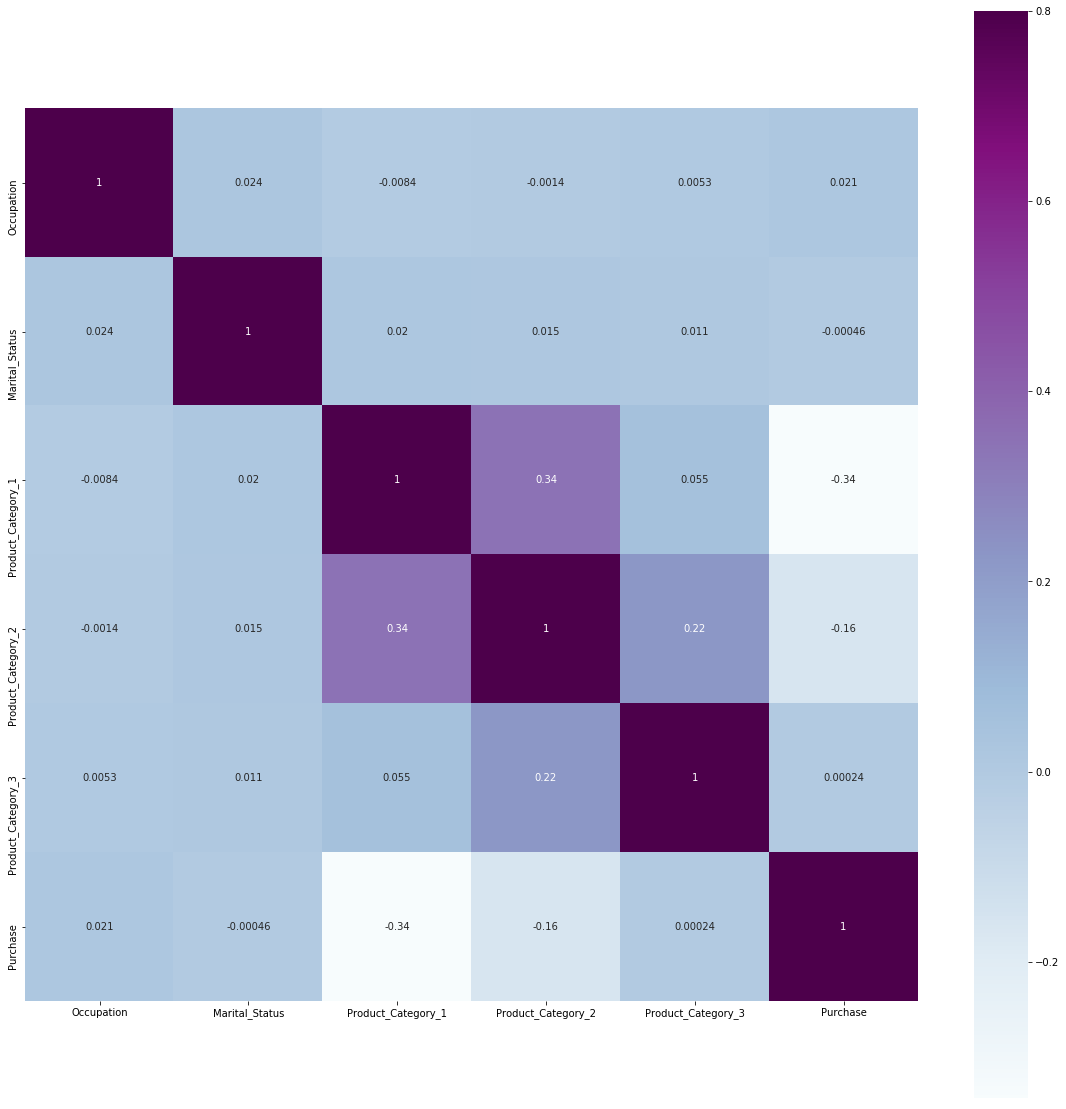

In [17]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(combined.corr(), annot=True,vmax=.8, square=True, cmap="BuPu");

In [18]:
combined.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,6.0,14.0,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,14.0,17.0,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,17.0,1057.0
4,P00285442,M,55+,16,C,4+,0,8,2.0,17.0,7969.0


In [19]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder() 

In [20]:
combined.iloc[:,1] = labelencoder_X.fit_transform(combined.iloc[:, 1])

In [21]:
combined.iloc[:,2] = labelencoder_X.fit_transform(combined.iloc[:, 2])

In [22]:
combined.iloc[:,4] = labelencoder_X.fit_transform(combined.iloc[:, 4])

In [23]:
combined.iloc[:,5] = labelencoder_X.fit_transform(combined.iloc[:, 5])


In [24]:
# combined.Product_ID = combined.Product_ID.astype()

In [25]:
product_id = list(combined["Product_ID"])

In [34]:
for index, item in enumerate(product_id):
    product_id[index] = product_id[index][1:]

In [37]:
combined.Product_ID = list(map(int,product_id))

In [38]:
train1 = combined[:550068]
test1 = combined[550068:]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
clf = ExtraTreesRegressor(n_estimators=300,n_jobs=-1)


In [132]:
clf.fit(train1.drop(["Purchase"],axis=1),train1.Purchase)

ValueError: could not convert string to float: 'P00371644'